<h1 align=center><font size = 5>Using Dropout in Regression Assignment   </font></h1> 

In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

import numpy as np

<a id="ref0"></a>
<h2 align=center>Get Some Data </h2>

In [2]:
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    def __init__(self,N_SAMPLES = 40,noise_std=1,train=True):
      
      
        self.x = torch.linspace(-1, 1, N_SAMPLES).view(-1,1)
        self.f=self.x**2
        
        if train!=True:
            torch.manual_seed(1)
         
            self.y = self.f+noise_std*torch.randn(self.f.size())
            self.y=self.y.view(-1,1)
            torch.manual_seed(0)
        else:
            self.y = self.f+noise_std*torch.randn(self.f.size())
            self.y=self.y.view(-1,1)
    def __getitem__(self,index):    
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len
    def plot(self):
        plt.figure(figsize=(6.1, 10))
        plt.scatter(self.x.numpy(), self.y.numpy(), label="Samples")
        plt.plot(self.x.numpy(), self.f.numpy()  ,label="True function",color='orange')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim((-1, 1))
        plt.ylim((-2, 2.5))
        plt.legend(loc="best")
        plt.show()

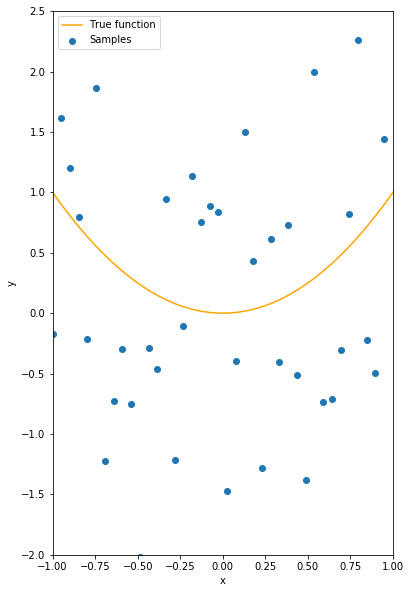

In [3]:
data_set=Data()
data_set.plot()

In [4]:
torch.manual_seed(0) 
validation_set=Data(train=False)

<a id="ref1"></a>
<h2 align=center>Create the Model, Optimizer, and Total Loss Function (cost)</h2>

In [5]:
torch.manual_seed(4) 

### Create a three-layer neural network <code>model</code> with a ReLU() activation function for regression. All the appropriate layers should be 300 units.

In [6]:
n_hidden = 30
model= torch.nn.Sequential(
    torch.nn.Linear(1, n_hidden), 
    torch.nn.ReLU(),
    torch.nn.Linear(n_hidden, n_hidden),

    torch.nn.ReLU(),
    torch.nn.Linear(n_hidden, 1),
)

### Create a three-layer neural network <code>model_drop</code> with a ReLU() activation function for regression. All the appropriate layers should be 300 units. Apply dropout to all but the last layer and make the probability of dropout is 50%.

In [7]:
n_hidden = 300
model_drop= torch.nn.Sequential(
    torch.nn.Linear(1, n_hidden),
    torch.nn.Dropout(0.5),  
    torch.nn.ReLU(),
    torch.nn.Linear(n_hidden, n_hidden),
    torch.nn.Dropout(0.5), 
    torch.nn.ReLU(),
    torch.nn.Linear(n_hidden, 1),
)

<a id="ref2"></a>
<h2 align=center>Train the Model via Mini-Batch Gradient Descent </h2>

In [8]:
model_drop.train()

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): Dropout(p=0.5)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): Dropout(p=0.5)
  (5): ReLU()
  (6): Linear(in_features=300, out_features=1, bias=True)
)

In [9]:
optimizer_ofit = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer_drop = torch.optim.Adam(model_drop.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

In [10]:
LOSS={}
LOSS['training data no dropout']=[]
LOSS['validation data no dropout']=[]
LOSS['training data dropout']=[]
LOSS['validation data dropout']=[]

In [11]:
epochs=500

for epoch in range(epochs):
    #make a prediction for both models 
    yhat = model(data_set.x)
    yhat_drop = model_drop(data_set.x)
    #calculate the lossf or both models 
    loss = criterion(yhat, data_set.y)
    loss_drop = criterion(yhat_drop, data_set.y)
    
    #store the loss for  both the training and validation  data for both models 
    LOSS['training data no dropout'].append(loss.item())
    LOSS['validation data no dropout'].append(criterion(model(validation_set.x), validation_set.y).item())
    LOSS['training data dropout'].append(loss_drop.item())
    model_drop.eval()
    LOSS['validation data dropout'].append(criterion(model_drop(validation_set.x), validation_set.y).item())
    model_drop.train()
    
    #clear gradient 
    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()
    #Backward pass: compute gradient of the loss with respect to all the learnable parameters
    loss.backward()
    loss_drop.backward()
    #the step function on an Optimizer makes an update to its parameters
    optimizer_ofit.step()
    optimizer_drop.step()

### Make a prediction by using the test set assign <code>model</code> to yhat and <code>model_drop</code> to yhat_drop.

In [14]:
yhat=model(data_set.x)
model_drop.eval()
yhat_drop=model_drop(data_set.x)

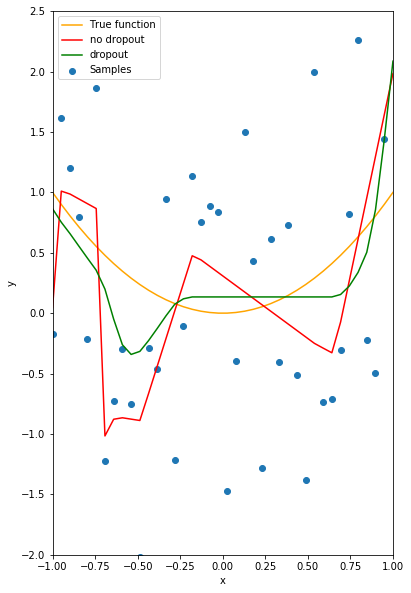

In [15]:
plt.figure(figsize=(6.1, 10))

plt.scatter(data_set.x.numpy(), data_set.y.numpy(), label="Samples")
plt.plot(data_set.x.numpy(), data_set.f.numpy()  ,label="True function",color='orange')
plt.plot(data_set.x.numpy(),yhat.detach().numpy(),label='no dropout',c='r')
plt.plot(data_set.x.numpy(),yhat_drop.detach().numpy(),label="dropout",c='g')


plt.xlabel("x")
plt.ylabel("y")
plt.xlim((-1, 1))
plt.ylim((-2, 2.5))
plt.legend(loc="best")
plt.show()

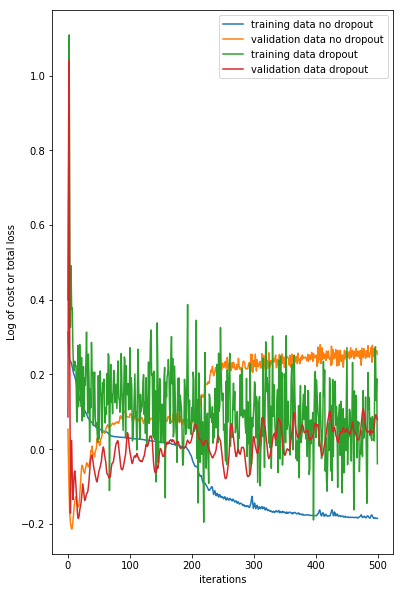

In [16]:
plt.figure(figsize=(6.1, 10))
for key, value in LOSS.items():
    plt.plot(np.log(np.array(value)),label=key)
    plt.legend()
    plt.xlabel("iterations")
    plt.ylabel("Log of cost or total loss")